In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataloader import read_csv, convert_to_lowercase
from preprocessing import preprocess_data_for_visualization
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [58]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/test.csv')

In [64]:
trainX[trainX['size_sqft'] == 1496000.0]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
18446,771950,4 bed condo for sale in avenue south residence,1 silat avenue,avenue south residence,condo,99-year leasehold,2023.0,4.0,4.0,1496000,NaN,unspecified,"studio, 1, 2, 3, 4 br",1074.0,https://www.99.co/singapore/condos-apartments/...,1.304855,103.773776,0,dover,queenstown


In [12]:
trainX, trainY = preprocess_data_for_visualization(trainX, trainY, testX)

In [13]:
trainX.head()

,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,total_num_units,lat,lng,subzone,planning_area
0,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115.0,NaN,unspecified,116.0,1.414399,103.837196,yishun south,yishun
1,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575.0,NaN,unspecified,NaN,1.372597,103.875625,serangoon north,serangoon
2,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070.0,low,partial,56.0,1.298773,103.895798,mountbatten,marine parade
3,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958.0,NaN,partial,638.0,1.312364,103.803271,farrer court,bukit timah
4,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732.0,NaN,unspecified,351.0,1.273959,103.843635,anson,downtown core


In [14]:
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names

In [15]:
train_X_Y.head()

,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,total_num_units,lat,lng,subzone,planning_area,price
0,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115.0,NaN,unspecified,116.0,1.414399,103.837196,yishun south,yishun,514500.0
1,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575.0,NaN,unspecified,NaN,1.372597,103.875625,serangoon north,serangoon,995400.0
2,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070.0,low,partial,56.0,1.298773,103.895798,mountbatten,marine parade,8485000.0
3,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958.0,NaN,partial,638.0,1.312364,103.803271,farrer court,bukit timah,2626000.0
4,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732.0,NaN,unspecified,351.0,1.273959,103.843635,anson,downtown core,1764000.0


In [16]:
df_property_type_average_price = train_X_Y.groupby('property_type', as_index=False)['price'].mean()
df_property_type_average_price.rename(columns={'price': 'average_price'}, inplace=True)
df_property_type_average_price.sort_values(by=['average_price'], ascending=False, inplace=True)

In [12]:
df_property_type_average_price.head(100)

,property_type,average_price
7,good class bungalow,3.783150e+07
1,bungalow,1.720501e+07
4,conservation house,8.641843e+06
16,semi-detached house,7.705623e+06
5,corner terrace,6.230950e+06
15,landed,5.409970e+06
19,townhouse,5.171600e+06
18,terraced house,4.874620e+06
2,cluster house,4.429750e+06
0,apartment,3.433778e+06


[Text(0.5, 1.0, 'Average prices of different property_types'),
 Text(0.5, 0, 'average_price'),
 Text(0, 0.5, 'property_type')]

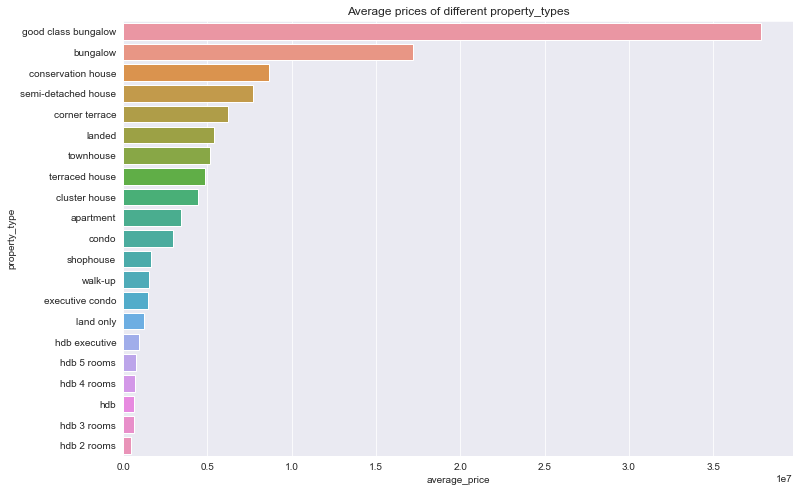

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_property_type_average_price, y='property_type', x='average_price', orient='h')
ax.set(title='Average prices of different property_types', xlabel='average_price', ylabel='property_type')
# container = ax.containers[0]
# ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
# ax.bar_label(ax.containers[0])
# ax.tick_params(axis='x', rotation=90)

In [19]:
df_property_type_counts = train_X_Y.groupby('property_type', as_index=False)['price'].count()
df_property_type_counts.rename(columns={'price': 'count'}, inplace=True)
df_property_type_counts.sort_values(by=['count'], ascending=False, inplace=True)

In [20]:
df_property_type_counts.head(100)

,property_type,count
3,condo,9545
8,hdb,2793
10,hdb 3 rooms,1190
11,hdb 4 rooms,1114
16,semi-detached house,1018
6,executive condo,1008
1,bungalow,746
12,hdb 5 rooms,674
0,apartment,540
18,terraced house,445


[Text(0.5, 1.0, 'Counts of different property_types'),
 Text(0.5, 0, 'count'),
 Text(0, 0.5, 'property_type')]

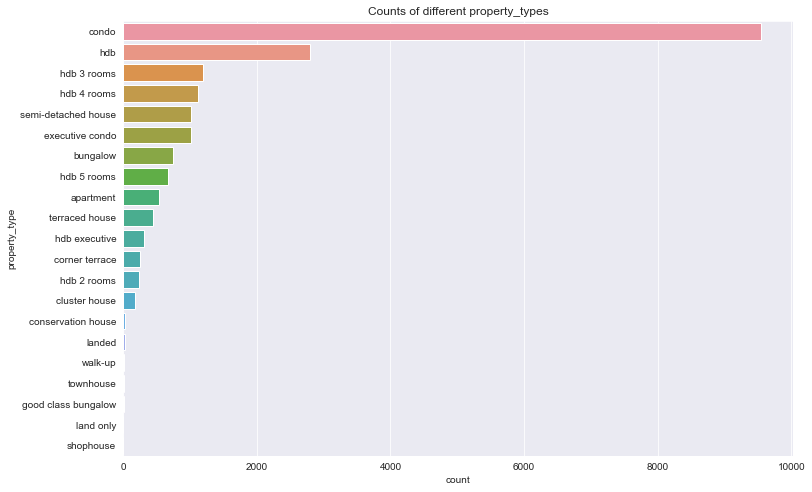

In [22]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_property_type_counts, y='property_type', x='count', orient='h')
ax.set(title='Counts of different property_types', xlabel='count', ylabel='property_type')
# ax.bar_label(ax.containers[0])

In [23]:
df_built_year_average_price = train_X_Y.groupby('built_year', as_index=False)['price'].mean()
df_built_year_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [24]:
df_built_year_average_price.head(100)

,built_year,average_price
0,1963.0,3.181075e+06
1,1967.0,4.453461e+06
2,1968.0,1.830667e+06
3,1969.0,2.101156e+06
4,1970.0,2.306227e+06
...,...,...
58,2024.0,3.047915e+06
59,2025.0,3.038147e+06
60,2026.0,3.177118e+06
61,2027.0,2.981571e+06


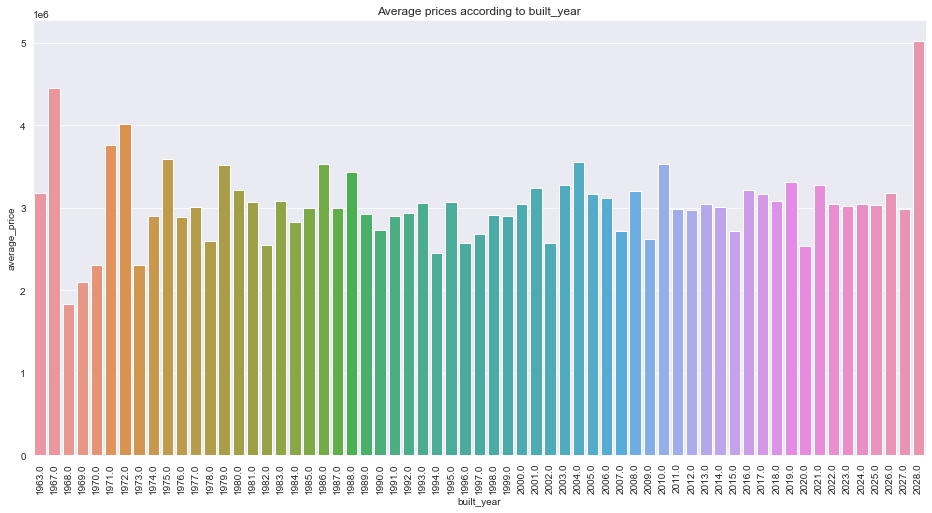

In [31]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_built_year_average_price, x='built_year', y='average_price')
ax.set(title='Average prices according to built_year', xlabel='built_year', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)

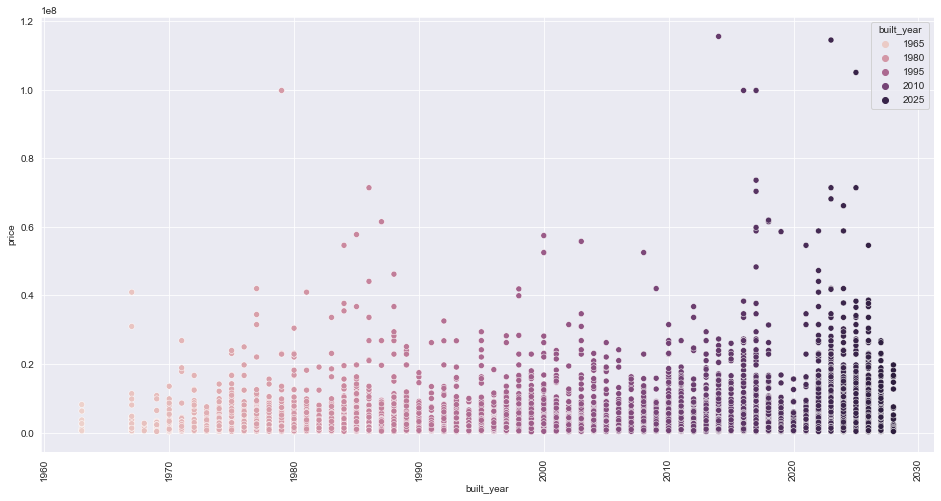

In [30]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data=train_X_Y, x='built_year', y='price', hue='built_year')
ax.tick_params(axis='x', rotation=90)

In [32]:
df_num_beds_average_price = train_X_Y.groupby('num_beds', as_index=False)['price'].mean()
df_num_beds_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [33]:
df_num_beds_average_price.head(100)

,num_beds,average_price
0,1.0,2.936668e+06
1,2.0,3.047538e+06
2,3.0,3.068624e+06
3,4.0,3.041881e+06
4,5.0,3.144575e+06
5,6.0,3.067787e+06
6,7.0,2.514400e+06
7,8.0,3.139739e+06
8,9.0,3.277162e+06
9,10.0,3.988766e+06


[Text(0.5, 1.0, 'Variation of Average price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'average_price')]

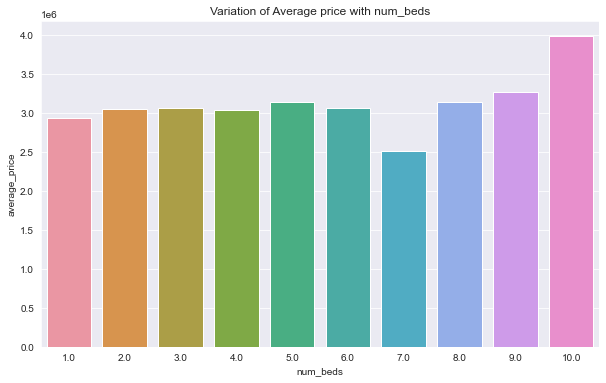

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_beds_average_price, x='num_beds', y='average_price')
ax.set(title='Variation of Average price with num_beds', xlabel='num_beds', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'price')]

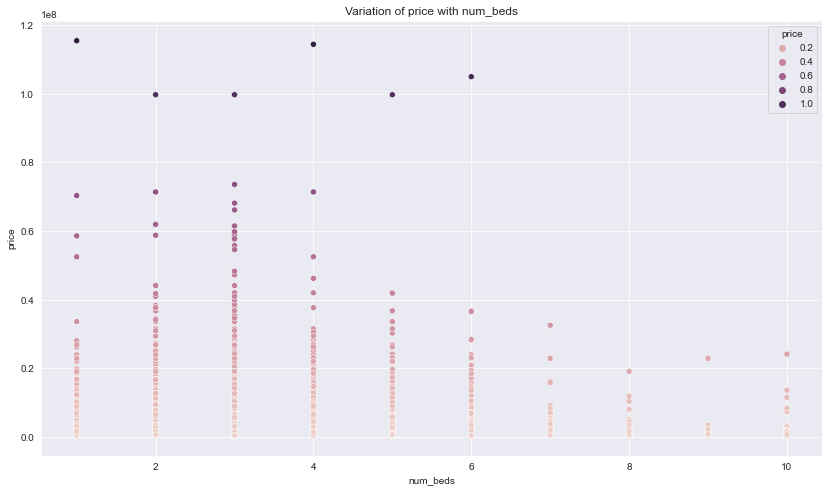

In [48]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_beds', y='price', hue='price')
ax.set(title='Variation of price with num_beds', xlabel='num_beds', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_beds')]

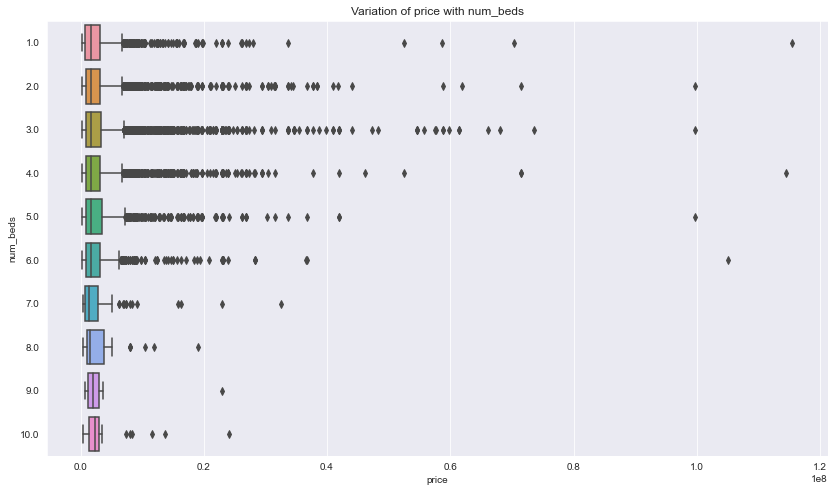

In [40]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_beds', orient='h')
ax.set(title='Variation of price with num_beds', xlabel='price', ylabel='num_beds')

In [41]:
df_num_baths_average_price = train_X_Y.groupby('num_baths', as_index=False)['price'].mean()
df_num_baths_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [42]:
df_num_baths_average_price.head(100)

,num_baths,average_price
0,1.0,2.952201e+06
1,2.0,3.072776e+06
2,3.0,2.986556e+06
3,4.0,3.169004e+06
4,5.0,3.016542e+06
5,6.0,3.211014e+06
6,7.0,2.875257e+06
7,8.0,3.355894e+06
8,9.0,3.900726e+06
9,10.0,2.701943e+06


[Text(0.5, 1.0, 'Variation of Average price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'average_price')]

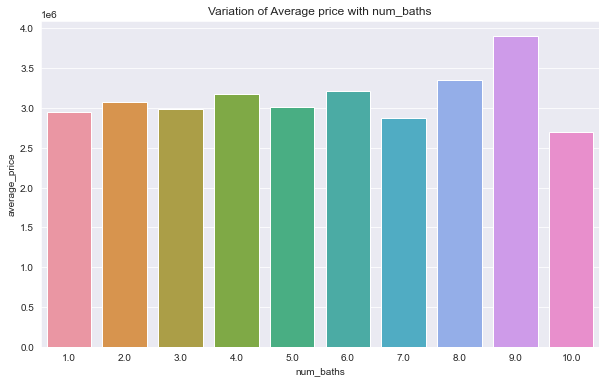

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_baths_average_price, x='num_baths', y='average_price')
ax.set(title='Variation of Average price with num_baths', xlabel='num_baths', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'price')]

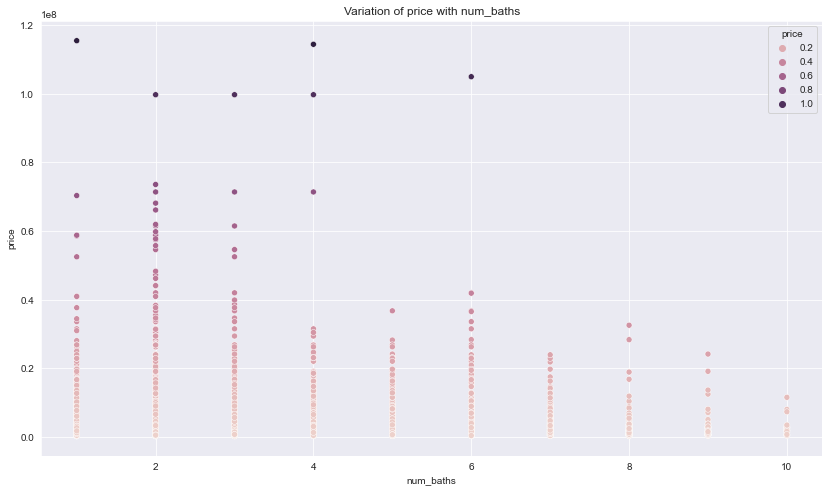

In [49]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_baths', y='price', hue='price')
ax.set(title='Variation of price with num_baths', xlabel='num_baths', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_baths')]

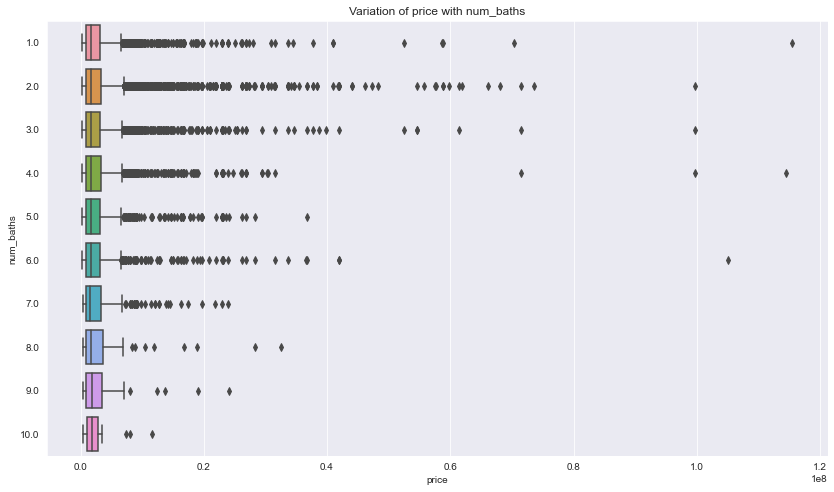

In [51]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_baths', orient='h')
ax.set(title='Variation of price with num_baths', xlabel='price', ylabel='num_baths')

In [73]:
def label_size_sqft(row):
    if row['size_sqft'] < 0:
        return -1
    if row['size_sqft'] > 0 and row['size_sqft'] <= 500:
        return 1
    if row['size_sqft'] > 500 and row['size_sqft'] <= 800:
        return 2
    if row['size_sqft'] > 800 and row['size_sqft'] <= 1100:
        return 3
    if row['size_sqft'] > 1100 and row['size_sqft'] <= 1500:
        return 4
    if row['size_sqft'] > 1500 and row['size_sqft'] <= 2000:
        return 5
    if row['size_sqft'] > 2000 and row['size_sqft'] <= 3000:
        return 6
    if row['size_sqft'] > 3000 and row['size_sqft'] <= 4000:
        return 7
    if row['size_sqft'] > 4000 and row['size_sqft'] <= 5000:
        return 8
    if row['size_sqft'] > 5000 and row['size_sqft'] <= 8000:
        return 9
    if row['size_sqft'] > 8000 and row['size_sqft'] <= 12000:
        return 10
    if row['size_sqft'] > 12000 and row['size_sqft'] <= 30000:
        return 11
    if row['size_sqft'] > 30000:
        return 12
    
train_X_Y['size_sqft_range'] = train_X_Y.apply(lambda row: label_size_sqft(row), axis=1)

In [74]:
train_X_Y['size_sqft_range'].value_counts()

4.0     5208
3.0     4665
2.0     4122
5.0     1684
9.0     1018
6.0      942
1.0      821
7.0      604
8.0      579
10.0     305
11.0      38
12.0       4
Name: size_sqft_range, dtype: int64

In [75]:
df_size_sqft_range_average_price = train_X_Y.groupby('size_sqft_range', as_index=False)['price'].mean()
df_size_sqft_range_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [76]:
df_size_sqft_range_average_price.head(50)

,size_sqft_range,average_price
0,1.0,2.798514e+06
1,2.0,3.065763e+06
2,3.0,3.088294e+06
3,4.0,3.048681e+06
4,5.0,2.879728e+06
5,6.0,3.110871e+06
6,7.0,3.245509e+06
7,8.0,3.132481e+06
8,9.0,3.105256e+06
9,10.0,3.158798e+06


[Text(0.5, 1.0, 'Variation of Average price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'average_price')]

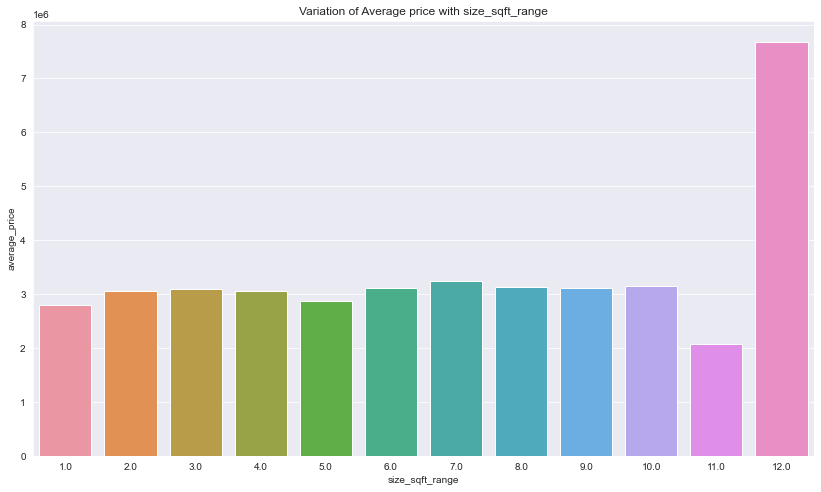

In [79]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_size_sqft_range_average_price, x='size_sqft_range', y='average_price')
ax.set(title='Variation of Average price with size_sqft_range', xlabel='size_sqft_range', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'price')]

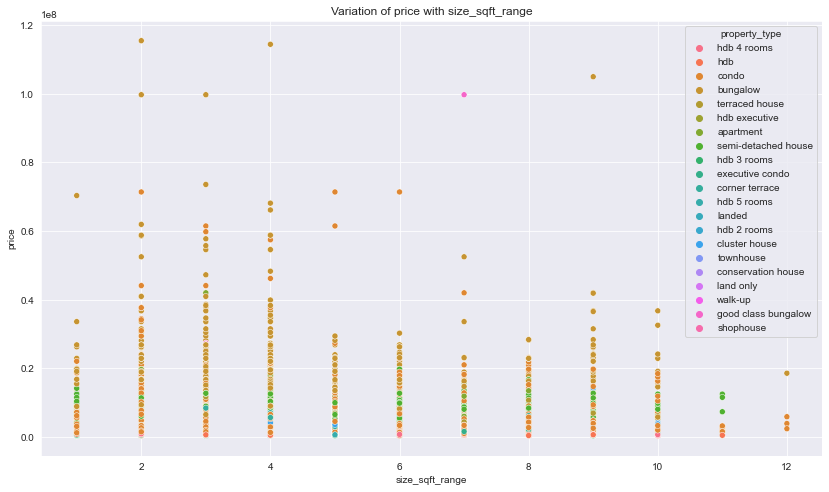

In [80]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='size_sqft_range', y='price', hue='property_type')
ax.set(title='Variation of price with size_sqft_range', xlabel='size_sqft_range', ylabel='price')